# GRIP @ THE SPARKS FOUNDATION 

Data Science And Business Analytics

### AUTHOR: MERRYBELL BABU

### Prediction using Supervised ML

Predicting the percentage of an student based on the number of study hours.

### Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Plotting the distribution of scores

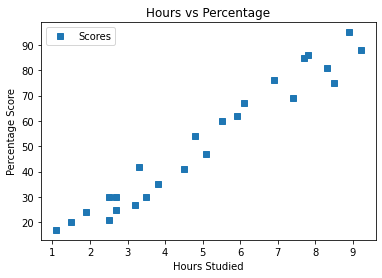

In [3]:
s_data.plot(x='Hours', y='Scores', style='s')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **Preparing the data**

In [4]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


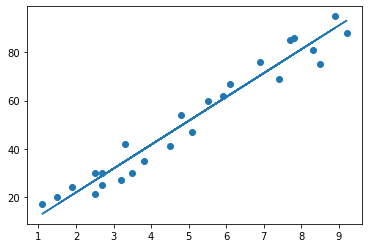

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**

In [8]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
print("Training Score: ", regressor.score(X_train,y_train))
print("Testing Score : ", regressor.score(X_test,y_test))

Training Score:  0.9515510725211552
Testing Score :  0.9454906892105356


### Predict the score if a student studies for 9.25 hrs/day

In [11]:
hours= 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("Predicted Score = {}".format(own_pred[0]))


Predicted Score = 93.69173248737538


In [12]:
#checking the accuracy score for train and test test
print("Training Score ",regressor.score(X_train,y_train))
print("Testing  Score ",regressor.score(X_test,y_test))

Training Score  0.9515510725211552
Testing  Score  0.9454906892105356


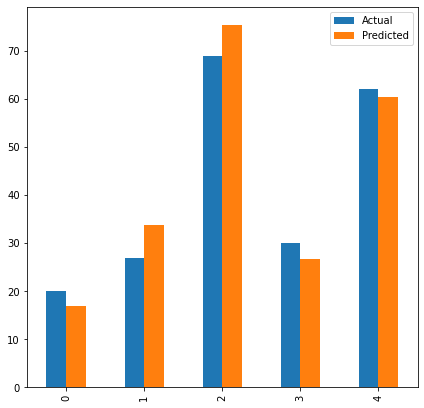

In [13]:
df.plot(kind = 'bar', figsize =(7,7))
plt.show()

### Evaluating Model

Evaluvating using mean square root

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Explained Variance Score:',metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
Explained Variance Score: 0.9482829156738147
